# Data

1. 資料都是數據化的多維陣列  
資料常要視覺化以幫助理解

2. 匯入多維陣列運算要用的函式庫 numpy，以下簡稱為 np  
匯入作圖要用的函式庫 matplotlib.pyplot，以下簡稱為 plt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

3. 串列(list)與陣列(array)的元素，皆有序可供索引  
串列的元素可以不同類別  
陣列的元素必須相同類別，儲存在記憶體的一段連續位址上

4. 複習一下串列

In [2]:
a = [ [3,4,5,6], [7,8,9,0] ]
print(type(a))
print(len(a))

<class 'list'>
2


5. 陣列 = np.array(串列)

6. 陣列 aka 張量  
矩陣 aka 二維張量  
向量 aka 一維張量

7. 查看陣列的形狀(shape)及維度(ndim)

In [3]:
a = np.array( [a,a,a,a,a] )
print(type(a))
print(len(a))
print(a.shape)
print(a.ndim)

<class 'numpy.ndarray'>
5
(5, 2, 4)
3


# Linear Regression

8. 線性迴歸就是求最接近全部樣本的一個線性函數

9. 用一個極簡的例子來理解何謂訓練神經元(線性迴歸)  
用五筆x(feature)及其y(label)，反覆更新w(weight)和b(bias)，使得線性函數y=wx+b更接近這五個資料點

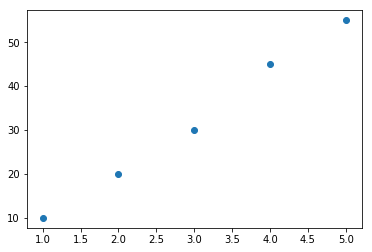

In [4]:
x = np.array( [1,2,3,4,5]      )
y = np.array( [10,20,30,45,55] )
plt.scatter(x,y)

# Model

10. 初學者用高階的Keras函式庫(之後再用TensorFlow函式庫)  
初學者用順序式模型(之後再用函數式模型)

In [5]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


11. Dense(全連接)層的三個引數：  
輸出y為一維的向量，故只需units=1個神經元  
輸入x為一維的向量，故這個Dense層的input_dim=1  
激活函數activation=None，讓y直接等於f(x)

In [6]:
from keras.layers import Dense
model.add(Dense(units=1, input_dim=1, activation=None))

12. 列印神經網路架構  
這個極簡的例子只有一個神經元，只訓練到w和b兩個模型參數

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Train

13. [Before training a model, you need to configure the learning process, which is done via the compile method.](https://keras.io/getting-started/sequential-model-guide/)

14. 模型參數的誤差函數Loss(w,b)的算法，採用MSE(均方誤差法)  
模型參數w和b的最佳解的找法，採用SGD(隨機梯度下降法)

In [8]:
model.compile(loss='MSE',
              optimizer='SGD')

15. 訓練10個回合(epochs)

In [9]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 968.4266
Epoch 2/10
5/5 [==============================] - 0s 486us/step - loss: 566.7767
Epoch 3/10
5/5 [==============================] - 0s 537us/step - loss: 332.7027
Epoch 4/10
5/5 [==============================] - 0s 391us/step - loss: 196.2840
Epoch 5/10
5/5 [==============================] - 0s 598us/step - loss: 116.7739
Epoch 6/10
5/5 [==============================] - 0s 721us/step - loss: 70.4274
Epoch 7/10
5/5 [==============================] - 0s 460us/step - loss: 43.4072
Epoch 8/10
5/5 [==============================] - 0s 454us/step - loss: 27.6494
Epoch 9/10
5/5 [==============================] - 0s 469us/step - loss: 18.4548
Epoch 10/10
5/5 [==============================] - 0s 672us/step - loss: 13.0851


16. 看w和b

In [10]:
w, b = model.layers[0].get_weights()
print('w =', w[0,0])
print('b =', b[0])

w = 9.60171
b = 2.0824652


17. 再訓練10個回合(epochs)

In [11]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 756us/step - loss: 9.9444
Epoch 2/10
5/5 [==============================] - 0s 393us/step - loss: 8.1028
Epoch 3/10
5/5 [==============================] - 0s 614us/step - loss: 7.0182
Epoch 4/10
5/5 [==============================] - 0s 655us/step - loss: 6.3749
Epoch 5/10
5/5 [==============================] - 0s 636us/step - loss: 5.9888
Epoch 6/10
5/5 [==============================] - 0s 483us/step - loss: 5.7526
Epoch 7/10
5/5 [==============================] - 0s 399us/step - loss: 5.6040
Epoch 8/10
5/5 [==============================] - 0s 364us/step - loss: 5.5064
Epoch 9/10
5/5 [==============================] - 0s 611us/step - loss: 5.4386
Epoch 10/10
5/5 [==============================] - 0s 503us/step - loss: 5.3883


18. 再看w和b

In [12]:
w, b = model.layers[0].get_weights()
print('w =', w[0,0])
print('b =', b[0])

w = 10.190408
b = 2.0754204


# Inference

19. 用訓練過的模型/神經網路做推論/預測  
輸入訓練資料的feature，輸出值接近但不等於label

In [13]:
model.predict(x)

array([[12.265828],
       [22.456236],
       [32.646645],
       [42.83705 ],
       [53.02746 ]], dtype=float32)

20. 訓練資料為藍色點  
預測結果為紅色點  
五點連線為一直線，因為此模型只有一個神經元，神經元是一個線性函數

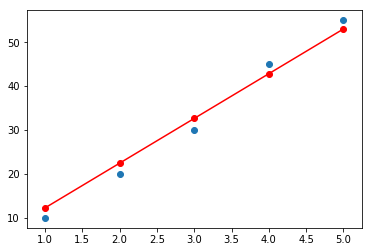

In [14]:
plt.scatter(x, y)
plt.scatter(x, model.predict(x), color='red')
plt.plot(x, model.predict(x), color='red')